# Capstone Project - Predicting Vehicle Collision Severity
### Applied Data Science Capstone by Carlos Fortin

## Introduction: Business Problem <a name="introduction"></a>

### Background

Today, most people in the developed world drive some type of motor vehicle daily. They drive to and from work, take their loved ones on vacations trips, their children to school and often do daily chores such as going to the supermarket utilizing their vehicles. Unfortunately, the more vehicles the more accidents take place. Some of these accidents are severe and can cost lives. 
For an accident to occur, there are many factors involved such as traffic violations (speeding, running a red light, etc.), mechanical failures such as a flat tire causing the driver to lose control and sometimes weather or road conditions might be poor causing the driver to struggle to keep control. 


### Problem 
The purpose of this report is to identify key features that increase the likelihood of an accident to occur and use them to create a model that can predict the severity of that accident so that future drivers might be able to understand the risk associated with their driving under specific conditions. 

## Data Aqcuisition and Cleaning 
### Source 
For this analysis and the model, the data from https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv was used. This data originally contained +190,000 rows and 38 columns (features). 

### Data Cleaning
Before any analysis and modeling, the data was first studied and cleansed. At first glance, there were several features that seemed to be redundant and missing so those were removed. Additionally, extreme outliers or data that seemed to be entered in mistake were also removed. 

In [1]:
import pandas as pd
import numpy as np 
import os

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
#read US accident Data 
df = pd.read_csv("Data-Collisions.csv")
df.head(5)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

In [5]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [6]:
#drops all columns that will not be used for this analysis and create new Data Frame 
clean_df= df.drop(columns=['ADDRTYPE','INTKEY','X','Y','INCDATE','PEDROWNOTGRNT','INATTENTIONIND','ST_COLCODE','ST_COLDESC','HITPARKEDCAR', 'JUNCTIONTYPE','COLDETKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','SEGLANEKEY', 'CROSSWALKKEY','STATUS','REPORTNO'])

In [7]:
#Shows remaining Columns in DF 
list(clean_df.columns)


['SEVERITYCODE',
 'OBJECTID',
 'INCKEY',
 'LOCATION',
 'SEVERITYDESC',
 'COLLISIONTYPE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'INCDTTM',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'SPEEDING']

In [8]:
clean_df.shape

(194673, 16)

In [9]:
#will replace all blank entries for weather, roadcondition and light condition with nan to later drop these 
#>>> df['columnname'].replace('', np.nan, inplace=True)
#>>> df.dropna(subset=['Tenant'], inplace=True)

clean_df['WEATHER'].replace('',np.nan,inplace=True)
clean_df['ROADCOND'].replace('',np.nan,inplace=True)
clean_df['LIGHTCOND'].replace('',np.nan,inplace=True)
clean_df['SPEEDING'].replace('',np.nan,inplace=True)
clean_df['UNDERINFL'].replace('',np.nan,inplace=True)

clean_df.dropna(subset=['WEATHER'], inplace=True)
clean_df.dropna(subset=['ROADCOND'], inplace=True)
clean_df.dropna(subset=['LIGHTCOND'], inplace=True)
clean_df.dropna(subset=['SPEEDING'], inplace=True)
clean_df.dropna(subset=['UNDERINFL'], inplace=True)

clean_df

,SEVERITYCODE,OBJECTID,INCKEY,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
24,2,33,1268,RAINIER AVE S AND S BRANDON ST,Injury Collision,Rear Ended,3,0,0,2,3/31/2013 10:05:00 AM,N,Clear,Dry,Daylight,Y
43,2,53,56100,OLSON PL SW BETWEEN 2ND AVE SW AND 3RD AVE SW,Injury Collision,Other,1,0,0,1,9/13/2006 10:46:00 PM,0,Raining,Wet,Dark - Street Lights On,Y
62,1,74,32000,35TH AVE SW BETWEEN 37TH AVE SW AND MARINE VIE...,Property Damage Only Collision,Parked Car,4,0,0,4,6/24/2004 7:43:00 PM,0,Clear,Dry,Daylight,Y
123,1,140,29700,MARION ST BETWEEN 2ND AVE AND 3RD AVE,Property Damage Only Collision,Rear Ended,2,0,0,2,3/5/2004,0,Raining,Wet,Daylight,Y
124,2,141,1135,HARVARD AVE AND E DENNY WAY,Injury Collision,Angles,2,0,0,2,3/29/2013 4:34:00 PM,Y,Clear,Dry,Daylight,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194414,1,219238,309651,S HOLLY ST BETWEEN 30TH AVE S AND 31ST AVE S,Property Damage Only Collision,Parked Car,2,0,0,2,1/4/2019 12:24:00 AM,N,Raining,Wet,Dark - Street Lights On,Y
194428,2,219255,309595,10TH AVE E AND E ROY E ST,Injury Collision,Pedestrian,2,1,0,1,12/22/2018 3:15:00 PM,N,Overcast,Dry,Dusk,Y
194481,2,219317,308340,AIRPORT WAY S BETWEEN S HARDY ST AND S OTHELLO ST,Injury Collision,Other,3,0,0,2,12/11/2018 9:15:00 AM,N,Raining,Wet,Daylight,Y
194492,1,219329,308810,BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ...,Property Damage Only Collision,Rear Ended,4,0,0,3,10/25/2018 8:52:00 PM,N,Raining,Wet,Dark - Street Lights On,Y


In [10]:
clean_df.shape


(9319, 16)

# Exploratory Data Analysis 

In this section of the report, I take a deeper dive into the data set. Key features are plotted to better visualize and understand how the data
is behaving and to spot any interesting characteristics that might not be obvious at a first glance. 

3524
5795


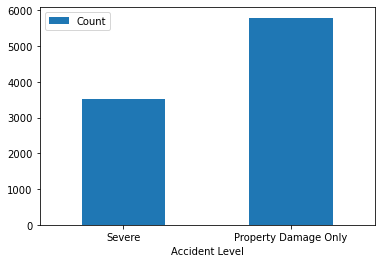

In [28]:
# import matplotlib to visualize data through graphs 

import matplotlib.pyplot as plot
#Loop below counts number of severe accidents- determined to be if there was an injury in the collision 

severe_count = 0 

for i in clean_df['SEVERITYDESC']:
    if i == 'Injury Collision':
        severe_count += 1 

non_severe = (clean_df['SEVERITYDESC'].count() - severe_count)

print(severe_count)
print(non_severe)

#df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
#ax = df.plot.bar(x='lab', y='val', rot=0)

plot1_variable = pd.DataFrame({'Accident Level':['Severe','Property Damage Only'],'Count':[severe_count,non_severe]})
plot1 = plot1_variable.plot.bar(x='Accident Level',y= 'Count', rot = 0)



After the data was cleaned, a total of 9,319 accidents were kept. As the graphs shows above, 3524 are considered severe, that is, a person(s) was injured and 5795 were not severe, that is, only damage to property occurred. 

Next, individual data analysis will be performed on each of the two categories, severe and not severe. Conditions for each will be counted and further analyzed. 

In [31]:
# Create a dataframe that contains only severe accidents 
# Create a dataframe that containes only non-severe accidents 
#df_filtered = df[df['Age'] >= 25]

clean_severeDF = clean_df[clean_df['SEVERITYDESC'] != 'Property Damage Only Collision']
clean_non_severeDF = clean_df[clean_df['SEVERITYDESC'] != 'Injury Collision']


In [51]:
# Create a for loop that counts weather conditions (clear or not clear), road conditions 
#(dry or not dry),Light conditions,speeding (Y or N), under influence (Y or N)

under_influence = 0 
clear = 0 
wet_road = 0 
light = 0 
speed = 0 

for i in clean_severeDF['UNDERINFL']:
    if i == '1':
        under_influence += 1 
for i in clean_severeDF['UNDERINFL']:
    if i == 'Y':
        under_influence += 1

for i in clean_severeDF['WEATHER']:
    if i == 'Clear':
        clear += 1
# this variable shows count of non-clear weather conditions 
bad_weather = 3534 - clear 



for i in clean_severeDF['ROADCOND']:
    if i == 'Wet':
        wet_road += 1



for i in clean_severeDF['LIGHTCOND']:
    if i == 'Daylight':
        light += 1
not_light = 3534-light




for i in clean_severeDF['SPEEDING']:
    if i == 'Y':
        speed += 1
        
print('Count of Severe Accidents under bad weather conditions:', bad_weather)
print('Count of Severe Accidents under influence:', under_influence)
print('Count of Severe Accidents under wet road conditions:', wet_road)
print('Count of Severe Accidents under no-daylight conditions:', not_light)
print('Count of Severe Accidents under speeding conditions:', speed)



Count of Severe Accidents under bad weather conditions: 1845
Count of Severe Accidents under influence: 604
Count of Severe Accidents under wet road conditions: 1548
Count of Severe Accidents under no-daylight conditions: 1707
Count of Severe Accidents under speeding conditions: 3524


### Severe Accident Summary

| Category           | Yes     | No       | Percent Total |
|--------------------|---------|----------|---------------|
| Bad Weather        |1845     |1679      | 52.35         |               
| Under Influence    |604      |2920      | 17.13         |
| Wet Road           |1548     |1976      | 43.92         |
| No Daylight        |1707     |1817      | 48.4          |

As it is clearly shown on the graph above, 52.35% of the severe accidents happened under bad weather conditions followed by the second highest at 48.4% which was when there was no daylight. 

Below, a similar analysis will be performed for non-severe accidents. 

In [56]:
under_influence = 0 
clear = 0 
wet_road = 0 
light = 0 
speed = 0 

for i in clean_non_severeDF['UNDERINFL']:
    if i == '1':
        under_influence += 1 
for i in clean_non_severeDF['UNDERINFL']:
    if i == 'Y':
        under_influence += 1

for i in clean_non_severeDF['WEATHER']:
    if i == 'Clear':
        clear += 1
bad_weather = 5795 - clear 

for i in clean_non_severeDF['ROADCOND']:
    if i == 'Wet':
        wet_road += 1



for i in clean_non_severeDF['LIGHTCOND']:
    if i == 'Daylight':
        light += 1
not_light = 5795-light




for i in clean_non_severeDF['SPEEDING']:
    if i == 'Y':
        speed += 1
        
print('Count of non-Severe Accidents under bad weather conditions:', bad_weather)
print('Count of non-Severe Accidents under influence:', under_influence)
print('Count of non-Severe Accidents under wet road conditions:', wet_road)
print('Count of non-Severe Accidents under no-daylight conditions:', not_light)
print('Count of non-Severe Accidents under speeding conditions:', speed)

Count of non-Severe Accidents under bad weather conditions: 3376
Count of non-Severe Accidents under influence: 644
Count of non-Severe Accidents under wet road conditions: 2848
Count of non-Severe Accidents under no-daylight conditions: 3119
Count of non-Severe Accidents under speeding conditions: 5795


### Non-Severe Accident Summary 

| Category           | Yes     | No       | Percent Total |
|--------------------|---------|----------|---------------|
| Bad Weather        |3376     |2419      |58.26          |               
| Under Influence    |644      |5151      |11.11          |
| Wet Road           |2848     |2947      |49.14          |
| No Daylight        |3119     |2676      |53.82          |

Again, as it is clear in the summary chart above, the two highest conditions that are true during an accident are bad weather (58.26%) and non-daylight conditions (53.82%). These features will be key in the development of the prediction algorithms in the next sections. 

# Methodology 

For this report and analysis, we will attempt to predict whether an accident will be severe or not under the following conditions: 
Weather, driving under the influence, wet road condition and lack of daylight. 

The first step was collecting the data which can be found on the data section of this report. The data initially contained +190,000 rows and 38 features. The second step, was cleaning the data and visualizing it to have a better understanding of what can be used and what should be discarded for this analysis. 

Third, after having a good understanding of the data, it will be modeled using machine learning algorithims used to predict the likelihood of an accident being severe given certain conditions. These will be compared and validated using standard accuracy tests. Given that the variable we are trying to predict, whether an accident will be severe or not, Logistic Regression is the ideal machine learning algorithm to be used. 

Finally, the results and conclusions will be summarized and reported. 


# Analysis

This section of the report contains the code and raw results from the analysis and modeling of the data. 

In [81]:
# Make sure all relevant libraries are installed 

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

Below, I will define X, that is all the features that will be used to predic the the severity of the accident. Also, y, severity of the accident will also be defined. 

In [82]:
X = np.asarray(clean_df[['UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']])
X[0:5]

array([['N', 'Clear', 'Dry', 'Daylight'],
       ['0', 'Raining', 'Wet', 'Dark - Street Lights On'],
       ['0', 'Clear', 'Dry', 'Daylight'],
       ['0', 'Raining', 'Wet', 'Daylight'],
       ['Y', 'Clear', 'Dry', 'Daylight']], dtype=object)

In [83]:
#ddf['edjefe'].replace({'no': 0, 'yes': 1})
#modify the dataframe to contain integers only 
#cols = ["Weight","Height","BootSize","SuitSize","Type"]
#df2[cols] = df2[cols].replace({'0':np.nan, 0:np.nan})


cols = ['UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SEVERITYDESC']
int_clean_df = clean_df[cols].replace({'N':0,'Y':1,'0':0,'1':1,'Clear':0,'Raining':1,'Blowing Sand/Dirt':1,'Fog/Smog/Smoke':1,'Other':1,'Overcast':1,'Severe Crosswind':1,'Sleet/Hail/Freezing Rain':1,'Snowing':1,'Unknown':1,'Dry':0,'Ice':1,'Oil':1,'Other':1,'Sand/Mud/Dirt':1,'Snow/Slush':1,'Standing Water':1,'Unknown':1,'Wet':1,'Daylight': 0,'Dark - No Street Lights':1,'Dark - Street Lights Off':1,'Dark - Street Lights On':1,'Dawn':1,'Dusk':1,'Other':1,'Unknown':1})
#int_clean_df = clean_df['WEATHER'].replace({'Clear':0,'Raining':1,'Blowing Sand/Dirt':1,'Fog/Smog/Smoke':1,'Other':1,'Overcast':1,'Severe Crosswind':1,'Sleet/Hail/Freezing Rain':1,'Snowing':1,'Unknown':1})
#int_clean_df = clean_df['ROADCOND'].replace({'Dry':0,'Ice':1,'Oil':1,'Other':1,'Sand/Mud/Dirt':1,'Snow/Slush':1,'Standing Water':1,'Unknown':1,'Wet':1})
#int_clean_df = clean_df['LIGHTCOND'].replace({'Daylight': 0,'Dark - No Street Lights':1,'Dark - Street Lights Off':1,'Dark - Street Lights On':1,'Dawn':1,'Dusk':1,'Other':1,'Unknown':1 })
int_clean_df



,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEVERITYDESC
24,0,0,0,0,Injury Collision
43,0,1,1,1,Injury Collision
62,0,0,0,0,Property Damage Only Collision
123,0,1,1,0,Property Damage Only Collision
124,1,0,0,0,Injury Collision
...,...,...,...,...,...
194414,0,1,1,1,Property Damage Only Collision
194428,0,1,0,1,Injury Collision
194481,0,1,1,0,Injury Collision
194492,0,1,1,1,Property Damage Only Collision


In [84]:
#Define Matrix with features. 0 means good condition, 1 means bad conditions 
X = np.asarray(int_clean_df[['UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']])
X[0:5]

array([[0, 0, 0, 0],
       [0, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 0]])

In [85]:
#define y intended prediction variable 

y = np.asarray(int_clean_df['SEVERITYDESC'])
y [0:5]

array(['Injury Collision', 'Injury Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision'], dtype=object)

In [86]:
# Normalize the data

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.39322726, -1.12627727, -1.09970038, -1.03417079],
       [-0.39322726,  0.88788083,  0.9093386 ,  0.96695828],
       [-0.39322726, -1.12627727, -1.09970038, -1.03417079],
       [-0.39322726,  0.88788083,  0.9093386 , -1.03417079],
       [ 2.54305868, -1.12627727, -1.09970038, -1.03417079]])

## Train/Test dataset

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7455, 4) (7455,)
Test set: (1864, 4) (1864,)


## Build Logistic Regression Model 

After train/test/split the data I will build the Logistic Regression model shown below. 

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [89]:
# Now, try and predict 

yhat = LR.predict(X_test)
yhat[0:30]

array(['Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Injury Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Da

In [90]:
#the following will return the probability for all classes 

yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:30]

array([[0.37165068, 0.62834932],
       [0.36628375, 0.63371625],
       [0.43816919, 0.56183081],
       [0.43816919, 0.56183081],
       [0.37765418, 0.62234582],
       [0.51243479, 0.48756521],
       [0.36035633, 0.63964367],
       [0.36628375, 0.63371625],
       [0.43816919, 0.56183081],
       [0.43816919, 0.56183081],
       [0.36628375, 0.63371625],
       [0.30475857, 0.69524143],
       [0.30475857, 0.69524143],
       [0.36628375, 0.63371625],
       [0.37165068, 0.62834932],
       [0.43786093, 0.56213907],
       [0.30475857, 0.69524143],
       [0.30475857, 0.69524143],
       [0.50667418, 0.49332582],
       [0.37165068, 0.62834932],
       [0.37165068, 0.62834932],
       [0.36628375, 0.63371625],
       [0.30475857, 0.69524143],
       [0.44448711, 0.55551289],
       [0.36628375, 0.63371625],
       [0.36628375, 0.63371625],
       [0.30475857, 0.69524143],
       [0.43816919, 0.56183081],
       [0.43816919, 0.56183081],
       [0.43816919, 0.56183081]])

# Evaluation and Results

### Jaccard Index

In [91]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6131974248927039

### Logloss

In [75]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6579357206666401

In [76]:
print (classification_report(y_test, yhat))

                                precision    recall  f1-score   support

              Injury Collision       0.46      0.12      0.19       708
Property Damage Only Collision       0.63      0.92      0.75      1156

                     micro avg       0.61      0.61      0.61      1864
                     macro avg       0.55      0.52      0.47      1864
                  weighted avg       0.57      0.61      0.54      1864



# Discussion 

As the data, analysis and evaluation show, Logistic regression is good at predicting the severity of an accident when given the correct features. Since the variable of interest is categorical, logistic regression is also a good model for this prediction. 

From general data observation, I can note that most accidents occur during poor weather conditions and poor light conditions. In fact, these two factors are the highest determinants of causing an accident. 



# Conclusion 

In conclusion, there are several factors involved in an accident. Some of these factors are impossible to take into considerations so it is important to remember that the even the best prediction model cannot guarantee 100% accuracy. That being said, however, based on my results the two factors that contribute most to an accident happening are weather condition and light condition. In fact, these two factors also contribute to the severity of the accidents as well. 

As a recommendation to all people who drive, I would suggest to reconsider travelling when the weather and liht conditions are not optimal. If that is not possible, I would encourage extra caution to avoid any collision. 